# Gaussian Naive Bayes

In [1]:
from sklearn.naive_bayes import GaussianNB
import sys
sys.path.append("../..//my-staff")
from database import load_ds

# Cargar dataset

In [2]:
X, y, features_names, class_names = load_ds("all")
X.shape

(293, 25)

In [3]:
X_train, y_train, _, _ = load_ds("train")
X_train.shape

(205, 25)

In [4]:
X_test, y_test, _, _ = load_ds("test")
X_test.shape

(88, 25)

In [5]:
from utils import grid_search_no_fss, SEED

In [6]:
model = GaussianNB()

In [7]:
param_grid = {}


In [8]:
result = grid_search_no_fss(X_train, y_train, model, param_grid)

Starting evaluation with all variables
f1 0.6160492126009367


In [9]:
result

ResultGridSearch(best_model=GaussianNB(), best_num_features=205, selected_feature_names=['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage', 'Hepatomegaly_N', 'Hepatomegaly_Y', 'Ascites_N', 'Ascites_Y', 'Drug_D-penicillamine', 'Drug_Placebo', 'Spiders_N', 'Spiders_Y', 'Sex_F', 'Sex_M', 'Edema_N', 'Edema_S', 'Edema_Y'], best_score=0.6160492126009367)

In [10]:
best_model = result.best_model

In [11]:
hipers = best_model.get_params()
hipers

{'priors': None, 'var_smoothing': 1e-09}

In [12]:
features = result.selected_feature_names
features

['N_Days',
 'Age',
 'Bilirubin',
 'Cholesterol',
 'Albumin',
 'Copper',
 'Alk_Phos',
 'SGOT',
 'Tryglicerides',
 'Platelets',
 'Prothrombin',
 'Stage',
 'Hepatomegaly_N',
 'Hepatomegaly_Y',
 'Ascites_N',
 'Ascites_Y',
 'Drug_D-penicillamine',
 'Drug_Placebo',
 'Spiders_N',
 'Spiders_Y',
 'Sex_F',
 'Sex_M',
 'Edema_N',
 'Edema_S',
 'Edema_Y']

# Training the model

In [13]:
model = GaussianNB(**hipers)

In [14]:
model.fit(X_train[features], y_train)

GaussianNB()

# Evaluation

In [15]:
from utils import eval_model


In [16]:
print("Training score: ", model.score(X_train[features], y_train))
print("Test score: ", model.score(X_test[features], y_test))

Training score:  0.751219512195122
Test score:  0.8636363636363636


In [17]:
y_prob = model.predict_proba(X_test[features])[:,0]
y_pred = model.predict(X_test[features])
eval_model(y_true= y_test, y_pred=y_pred, y_prob=y_prob)

Métricas de evaluación:
Precision: 0.8635
Recall: 0.8636
F1-score: 0.8631
Brier Score: 0.8388


# Visualización del modelo

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
import pandas as pd

In [3]:
# Train Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X, y)

GaussianNB()

In [44]:
X_test = X[1:2]

In [45]:
X_test

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,...,Spiders_Y,Hepatomegaly_N,Hepatomegaly_Y,Ascites_N,Ascites_Y,Edema_N,Edema_S,Edema_Y,Sex_F,Sex_M
1,4500,56.484932,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,...,1,0,1,1,0,1,0,0,1,0


In [51]:
filas = []
age_range = range(20, 80)
for edad in age_range :
    fila_temporal = X_test.copy()
    fila_temporal['Age'] = edad
    filas.append(fila_temporal)

X_proba = pd.concat(filas, ignore_index=True)

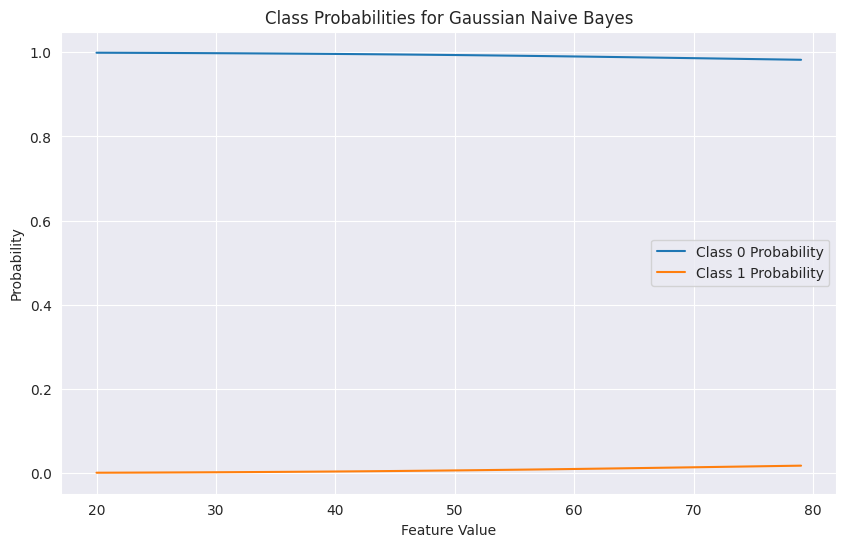

In [52]:

# Predict class probabilities for each point in the range
probabilities = gnb.predict_proba(X_proba)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(age_range, probabilities[:, 0], label='Class 0 Probability')
plt.plot(age_range, probabilities[:, 1], label='Class 1 Probability')
plt.xlabel('Feature Value')
plt.ylabel('Probability')
plt.title('Class Probabilities for Gaussian Naive Bayes')
plt.legend()
plt.show()

In [46]:
sgot_range = np.linspace(23.35, 457.25, 400)

In [47]:
filas = [X_test.assign(SGOT=e) for e in sgot_range]
X_proba = pd.concat(filas, ignore_index=True)

In [48]:
X_proba

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,...,Spiders_Y,Hepatomegaly_N,Hepatomegaly_Y,Ascites_N,Ascites_Y,Edema_N,Edema_S,Edema_Y,Sex_F,Sex_M
0,4500,56.484932,1.1,302.0,4.14,54.0,7394.8,23.350000,88.0,221.0,...,1,0,1,1,0,1,0,0,1,0
1,4500,56.484932,1.1,302.0,4.14,54.0,7394.8,24.437469,88.0,221.0,...,1,0,1,1,0,1,0,0,1,0
2,4500,56.484932,1.1,302.0,4.14,54.0,7394.8,25.524937,88.0,221.0,...,1,0,1,1,0,1,0,0,1,0
3,4500,56.484932,1.1,302.0,4.14,54.0,7394.8,26.612406,88.0,221.0,...,1,0,1,1,0,1,0,0,1,0
4,4500,56.484932,1.1,302.0,4.14,54.0,7394.8,27.699875,88.0,221.0,...,1,0,1,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,4500,56.484932,1.1,302.0,4.14,54.0,7394.8,452.900125,88.0,221.0,...,1,0,1,1,0,1,0,0,1,0
396,4500,56.484932,1.1,302.0,4.14,54.0,7394.8,453.987594,88.0,221.0,...,1,0,1,1,0,1,0,0,1,0
397,4500,56.484932,1.1,302.0,4.14,54.0,7394.8,455.075063,88.0,221.0,...,1,0,1,1,0,1,0,0,1,0
398,4500,56.484932,1.1,302.0,4.14,54.0,7394.8,456.162531,88.0,221.0,...,1,0,1,1,0,1,0,0,1,0


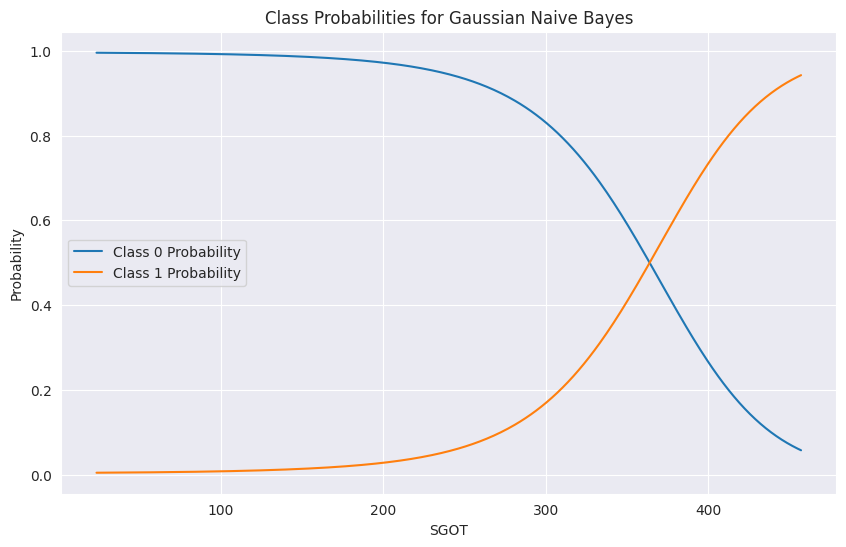

In [50]:
# Predict class probabilities for each point in the range
probabilities = gnb.predict_proba(X_proba)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(sgot_range, probabilities[:, 0], label='Class 0 Probability')
plt.plot(sgot_range, probabilities[:, 1], label='Class 1 Probability')
plt.xlabel('SGOT')
plt.ylabel('Probability')
plt.title('Class Probabilities for Gaussian Naive Bayes')
plt.legend()
plt.show()

In [55]:
bilirruna_range = np.linspace(0.3, 28, 400)
filas = [X_test.assign(Bilirubin=e) for e in bilirruna_range]
X_proba = pd.concat(filas, ignore_index=True)

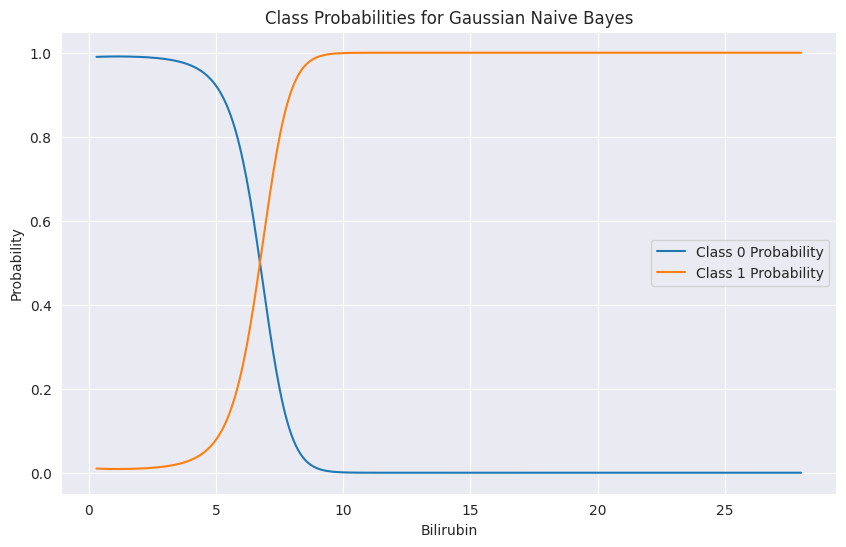

In [57]:
probabilities = gnb.predict_proba(X_proba)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(bilirruna_range, probabilities[:, 0], label='Class 0 Probability')
plt.plot(bilirruna_range, probabilities[:, 1], label='Class 1 Probability')
plt.xlabel('Bilirubin')
plt.ylabel('Probability')
plt.title('Class Probabilities for Gaussian Naive Bayes')
plt.legend()
plt.show()